In [1]:
import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import tensorflow.keras as keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

In [2]:
train_data_dir = '/content/acapp-train-classification/acapp_data/training_images/'

In [3]:
!rm -rf acapp-train-classification
!git clone https://github.com/dmmajithia/acapp-train-classification.git

Cloning into 'acapp-train-classification'...
remote: Enumerating objects: 20680, done.
remote: Counting objects: 100% (20680/20680), done.
remote: Compressing objects: 100% (20679/20679), done.
remote: Total 64732 (delta 7), reused 20665 (delta 1), pack-reused 44052
Receiving objects: 100% (64732/64732), 1.19 GiB | 37.71 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Checking out files: 100% (64006/64006), done.


In [4]:
!ls /content/acapp-train-classification/acapp_data/training_images/one_train | wc -l

9191


In [65]:
!mv /content/acapp-train-classification/acapp_data/training_images/mul_trains/* /content/acapp-train-classification/acapp_data/training_images/one_train/

In [66]:
# !rm -rf /content/acapp-train-classification/acapp_data/training_images/mul_trains
!rm -rf /content/acapp-train-classification/acapp_data/training_images/night_no_train
!rm -rf /content/acapp-train-classification/acapp_data/training_images/night_train
!rm -rf /content/acapp-train-classification/acapp_data/training_images/mul_trains

In [112]:
img_height, img_width = 300,300
batch_size = 50
'''
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    # class_mode='categorical',
    # class_mode='binary',
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    # class_mode='categorical',
    # class_mode='binary',
    class_mode='sparse',
    subset='validation') # set as validation data
'''

# Validation ImageDataGenerator with rescaling.
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
# Training ImagaDataGenerator with Augmentation transf.  
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,\
                                   rotation_range=15, shear_range=10,\
                                   zoom_range=0.25, fill_mode='nearest', \
                                   height_shift_range=0.25, width_shift_range=0.25)

# Create a flow from the directory for validation data - seed=42
# Choose subset = 'validation'
validation_generator = valid_datagen.flow_from_directory(train_data_dir,
                                                         subset='validation',
                                                         shuffle=True, 
                                                         seed=42, 
                                                         target_size=(img_height, img_width),
                                                         batch_size=batch_size,
                                                         class_mode='binary')
# Create a flow from the directory using same seed and 'training' subset.
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=42,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 3933 images belonging to 2 classes.
Found 9180 images belonging to 2 classes.


In [61]:
# acc = 95-99, batch_size = 50, epochs = 20
input_shape = (300, 300, 3)
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [113]:
def get_model_daytime2class():
  # acc = 95-99, batch_size = 50, epochs = 20
  input_shape = (300, 300, 3)
  # Creating a Sequential Model and adding the layers
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
  model.add(Dense(64, activation='relu'))
  # model.add(Dropout(0.1))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [89]:
# input_shape = (300, 300, 3)
# # Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(64, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(128, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dense(5,activation='softmax'))

In [114]:
model = get_model_daytime2class()
# model = keras.applications.Xception(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=input_shape,
#     pooling="max",
#     classes=2,
#     classifier_activation="softmax",
# )

model.compile(optimizer='adam', 
              # loss='sparse_categorical_crossentropy', 
              # loss='kullback_leibler_divergence',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 20

history = model.fit_generator(
    train_generator,
    steps_per_epoch=int(np.ceil(train_generator.n / float(batch_size))),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=int(np.ceil(validation_generator.n / float(batch_size)))
)

Epoch 1/20
184/184 [==============================] - 186s 1s/step - loss: 0.4520 - accuracy: 0.7830 - val_loss: 0.3822 - val_accuracy: 0.7696
Epoch 2/20
184/184 [==============================] - 182s 989ms/step - loss: 0.3157 - accuracy: 0.8552 - val_loss: 0.2376 - val_accuracy: 0.9057
Epoch 3/20
 45/184 [======>.......................] - ETA: 2:07 - loss: 0.2669 - accuracy: 0.8858

In [18]:
model.save('daytime2class')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: daytime2class/assets


In [19]:
!tar -cvzf daytime2class.tgz daytime2class

daytime2class/
daytime2class/saved_model.pb
daytime2class/assets/
daytime2class/variables/
daytime2class/variables/variables.index
daytime2class/variables/variables.data-00000-of-00001


In [20]:
from google.colab import files
files.download('/content/daytime2class.tgz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

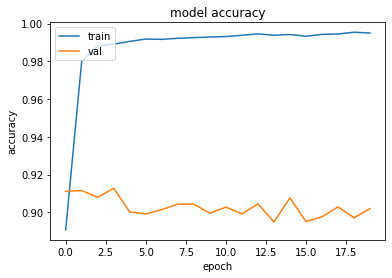

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

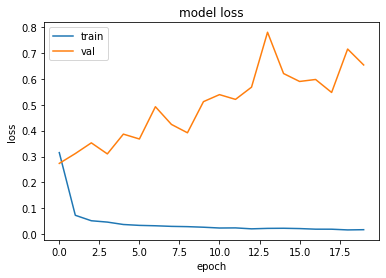

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()